In [89]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re, collections
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score
from nltk.corpus import stopwords


In [4]:
dataframe = pd.read_csv('data/essays_and_scores.csv', encoding = 'latin-1')
train = pd.read_csv('data/training_set_rel3.tsv',sep='\t', encoding = 'latin-1')
test = pd.read_csv('data/test_set.tsv',sep='\t', encoding = 'latin-1')


In [5]:
dataframe.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [6]:
train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [8]:
#domain 1
train_d1 = train[train['essay_set']==1]
test_d1 = test[test['essay_set']==1]

In [9]:
train_d1 = train_d1[['essay_id', 'essay_set','essay','domain1_score']]

In [10]:
train_d1

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8
5,6,1,"Dear @LOCATION1, I think that computers have a...",8
6,7,1,Did you know that more and more people these d...,10
7,8,1,@PERCENT1 of people agree that computers make ...,10
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9
9,10,1,In the @LOCATION1 we have the technology of a ...,9


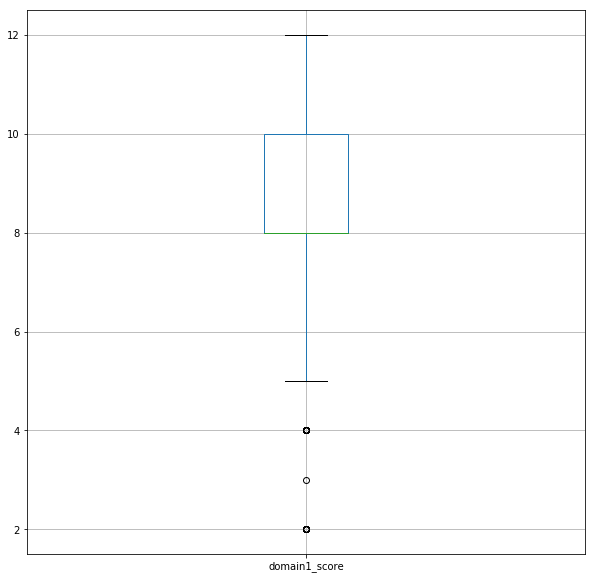

In [11]:
# Boxlot can be used to visualize the distribution of domain1_score values over each essay set.
%matplotlib inline
train_d1.boxplot(column='domain1_score', figsize=(10, 10))

In [12]:
data = train_d1[['essay_set','essay','domain1_score']].copy()
print(data)

      essay_set                                              essay  \
0             1  Dear local newspaper, I think effects computer...   
1             1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             1  Dear Local Newspaper, @CAPS1 I have found that...   
4             1  Dear @LOCATION1, I know having computers has a...   
5             1  Dear @LOCATION1, I think that computers have a...   
6             1  Did you know that more and more people these d...   
7             1  @PERCENT1 of people agree that computers make ...   
8             1  Dear reader, @ORGANIZATION1 has had a dramatic...   
9             1  In the @LOCATION1 we have the technology of a ...   
10            1  Dear @LOCATION1, @CAPS1 people acknowledge the...   
11            1  Dear @CAPS1 @CAPS2 I feel that computers do ta...   
12            1  Dear local newspaper I raed ur argument on the...   
13            1  My 

# Data analysis

In [14]:
#Tokenize a sentence into words
def sentence_to_wordlist(input_sentence):
    clean_sentence = re.sub("[^a-zA-Z0-9]",'',input_sentence)
    return nltk.word_tokenize(clean_sentence)

In [19]:
#Tokenize an essay into list of words
def essay_to_wordlists(input_essay):
    stripped_essay = input_essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(stripped_essay)
    tokenized_sentences = []
    for sentence in sentences:
        if len(sentence) > 0:
            tokenized_sentences.append(sentence_to_wordlist(sentence))
    return tokenized_sentences

In [20]:
tokenized_sentences = essay_to_wordlists(data['essay'][0])

In [23]:
#calculate word length (average) in essay
def avg_word_len(essay):
    clean_essay = re.sub(r'\W',' ',essay)
    words = nltk.word_tokenize(clean_essay)
    return sum(len(word) for word in words) / len(words)

In [24]:
average_essay_word_length = []
for i in data['essay']:
    l = avg_word_len(i)
    average_essay_word_length.append(l)
print("domain1 average word length: ", sum(average_essay_word_length) / len(average_essay_word_length))

domain1 average word length:  4.33473967079466


In [25]:
#calculate number of words in an essay
def word_count(essay):
    clean_essay = re.sub(r'\W',' ',essay)
    words = nltk.word_tokenize(clean_essay)
    return len(words)

In [28]:
average_essay_word_count = []
for i in data['essay']:
    c = word_count(i)
    average_essay_word_count.append(c)
print("domain1 average word count: ", sum(average_essay_word_count) / len(average_essay_word_count))

domain1 average word count:  370.62591138530564


In [34]:
#calculate total characters
def char_count(essay):
    clean_essay = re.sub(r'\s','',essay)
    return len(clean_essay)

In [35]:
average_essay_char_count = []
for i in data['essay']:
    c = char_count(i)
    average_essay_char_count.append(c)
print("domain1 average char count: ", sum(average_essay_char_count) / len(average_essay_char_count))

domain1 average char count:  1664.6135726303983


In [36]:
#calculate number of sentences
def sent_count(essay):
    sentences = nltk.sent_tokenize(essay)
    return len(sentences)

In [37]:
average_essay_sent_count = []
for i in data['essay']:
    c = sent_count(i)
    average_essay_sent_count.append(c)
print("domain1 average setence count: ", sum(average_essay_sent_count) / len(average_essay_sent_count))

domain1 average setence count:  22.779024116657318


In [106]:
#calculate number of lemmas per essay
def analysis_on_lemmas(essay):
    clean_essay = re.sub(r'\W',' ',essay)
    words = nltk.word_tokenize(clean_essay)    
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    #print(filtered_words)
    
    lemmas = []
    lemmas_dict = {}
    noun_count, adj_count, verb_count, adv_count = 0, 0, 0, 0

    wordnet_lemmatizer = WordNetLemmatizer()
    for word in filtered_words:
        words = nltk.word_tokenize(word)
        tagged = nltk.pos_tag(words)
        #print(tagged)
        token = tagged[0][0]
        pos_tag = tagged[0][1]
        #print(pos_tag)
        if pos_tag.startswith('N'):
            pos = wordnet.NOUN
            #print(pos)
            noun_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] = 1
        elif pos_tag.startswith('J'):
            pos = wordnet.ADJ
            adj_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1
        elif pos_tag.startswith('V'):
            pos = wordnet.VERB
            verb_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1
        elif pos_tag.startswith('R'):
            pos = wordnet.ADV
            adv_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1
        else:
            pos = wordnet.NOUN
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1             
    lemma_count = len(set(lemmas))
    return lemma_count, noun_count, adj_count, verb_count, adv_count

In [111]:
average_essay_lemma_count = []
ave_noun_count, ave_adj_count, ave_verb_count, ave_adv_count = [], [], [], []
for i in data['essay']:
    lemma_count, noun_count, adj_count, verb_count, adv_count = analysis_on_lemmas(i)
    average_essay_lemma_count.append(lemma_count)
    ave_noun_count.append(noun_count)
    ave_adj_count.append(adj_count)
    ave_verb_count.append(verb_count)
    ave_adv_count.append(adv_count)
    
print("domain1 average lemma count: ", sum(average_essay_lemma_count) / len(average_essay_lemma_count))
print("domain1 average noun count: ", sum(ave_noun_count) / len(ave_noun_count))
print("domain1 average adj count: ", sum(ave_adj_count) / len(ave_adj_count))
print("domain1 average verb count: ", sum(ave_verb_count) / len(ave_verb_count))
print("domain1 average adv count: ", sum(ave_adv_count) / len(ave_adv_count))

domain1 average lemma count:  120.59562535053281
domain1 average noun count:  124.22378014582165
domain1 average adj count:  15.053280987100393
domain1 average verb count:  24.2630398205272
domain1 average adv count:  13.04038137969714


In [ ]:
#calculate number of stem per essay

In [112]:
#Getting bag of words (BOW) counts:
def get_count_bag_vector(essays):
    vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,3),stop_words='english')
    count_vectors = vectorizer.fit_transform(essays)
    feature_names = vectorizer.get_feature_names()
    return feature_names, count_vectors

In [113]:
#splitting data into train data and test data (70/30)
def split_dataset(set_num):
    feature_names_cv, count_vectors = get_count_bag_vector(data[data['essay_set'] == set_num]['essay'])
    X_cv = count_vectors.toarray()
    y_cv = data[data['essay_set'] == set_num]['domain1_score'].as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size=0.3)
    return X_train, X_test, y_train, y_test

In [110]:
X_train, X_test, y_train, y_test = split_dataset(set_num=1)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [115]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,3),stop_words='english')
count_vectors = vectorizer.fit_transform(data['essay'])
feature_names = vectorizer.get_feature_names()

# Modeling

In [26]:
# Training a linear regression model using only Bag of Words (BOW)
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)

In [31]:
#result

print('Coefficients: \n', linearRegression.coef_)
print('Mean squared error: %.2f'%mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_pred))**0.5)
print('Variance score: %.2f'%linearRegression.score(X_test,y_test))
print('Cohen\'s kappa score: %.2f'%cohen_kappa_score(np.rint(y_pred),y_test))

Coefficients: 
 [ 0.06402593  0.14607205 -0.04622805 ... -0.02305406  0.03218814
  0.01514562]
Mean squared error: 1.64
Root Mean squared error: 1.28
Variance score: 0.38
Cohen's kappa score: 0.17


### this result seems not good enought as RMSE is large, desirable is <1